In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1

In [4]:
p1.window

In [5]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


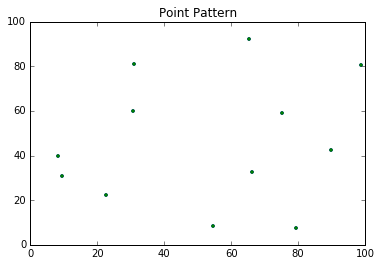

In [6]:
p1.plot()

(0, 150)

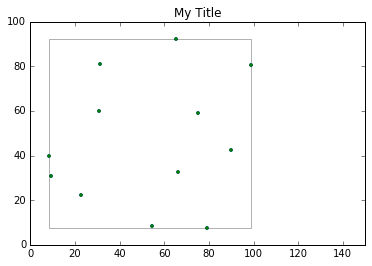

In [7]:
p1.plot(window=True, title="My Title")
plt.xlim(0,150)


In [8]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [9]:
from process import PoissonPointProcess as csr
vapp = csr(as_window(state), 300, 1, asPP=True).realizations[0]

In [10]:
vapp.summary()

Point Pattern
300 points
Bounding rectangle [(306570.419335,4047317.17679), (976991.774025,4338279.60547)]
Area of window: 1.03195696156e+11
Intensity estimate for window: 2.90709798156e-09


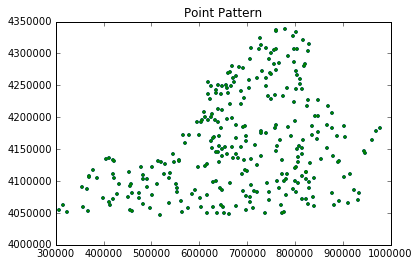

In [11]:
vapp.plot()

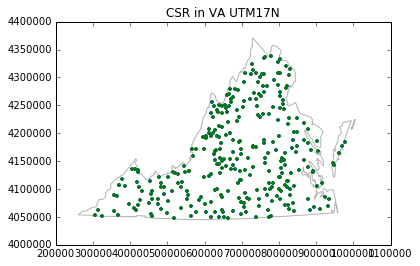

In [12]:
vapp.plot(window=True, title="CSR in VA UTM17N")

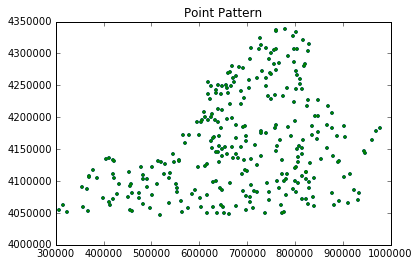

In [13]:
vapp.plot()

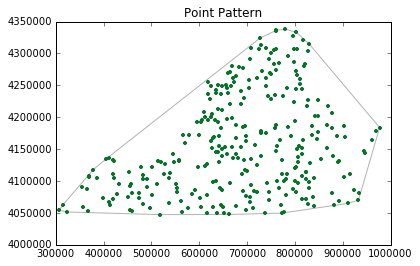

In [14]:
vapp.plot(hull=True)

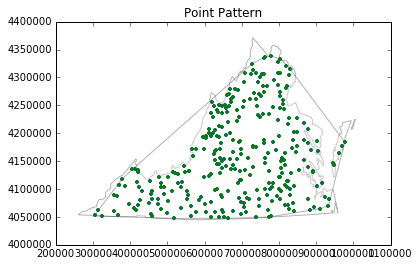

In [15]:
vapp.plot(hull=True, window=True)

In [16]:
vapp.hull

array([[  973801.87317285,  4184311.85172547],
       [  972931.02465498,  4206133.87466486],
       [  788089.77522969,  4355059.23318649],
       [  733735.27302622,  4324257.41535245],
       [  366811.30789473,  4115550.34091295],
       [  317502.24771867,  4080534.35112215],
       [  295260.31899434,  4054621.1652427 ],
       [  519960.93121878,  4047522.95102869],
       [  568175.50573766,  4047014.53229087],
       [  642581.22192095,  4046260.84929531],
       [  754945.09831461,  4050079.10043206],
       [  866115.99787184,  4056053.95690954],
       [  936840.43817487,  4062967.67064416],
       [  949444.94595654,  4081515.99605665]])